### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import pickle

### Reading the Dataset

In [2]:
air_data = pd.read_csv('air-quality-india.csv')

In [3]:
air_data.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


### Checking the shape of the dataset

In [4]:
air_data.shape

(36192, 6)

### Checking for null values of the dataset

In [5]:
air_data.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

### Checking for information about the dataset

In [6]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


### Dropping the timestamp column

In [7]:
air_data.drop(columns=['Timestamp'], axis=1, inplace=True)

In [8]:
air_data.head()

,Year,Month,Day,Hour,PM2.5
0,2017,11,7,12,64.51
1,2017,11,7,13,69.95
2,2017,11,7,14,92.79
3,2017,11,7,15,109.66
4,2017,11,7,16,116.50


### Visualizing the correlation in between the features

<Axes: >

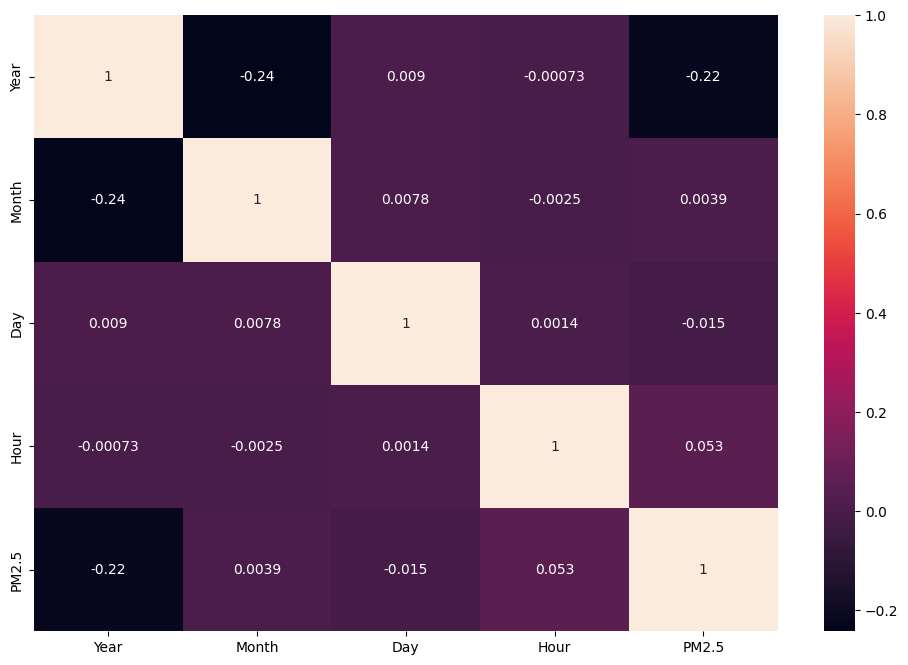

In [9]:
plt.figure(figsize=(12, 8))

sns.heatmap(air_data.corr(), annot=True)

### Creating a small dataset of 8000 datapoints out of the original dataset in order to train the model faster

In [10]:
air_data_small = air_data.sample(n=8000)

In [11]:
air_data.to_csv('air-quality-india-small.csv')

### Separating features and labels

In [12]:
X = air_data_small.drop(columns=['PM2.5'], axis=1)
y = air_data_small['PM2.5']

In [13]:
X.head()

,Year,Month,Day,Hour
1026,2017,12,27,5
16823,2020,1,20,8
28982,2021,7,4,4
19096,2020,4,24,4
4721,2018,7,3,17


In [14]:
y.head()

1026     119.09
16823     58.66
28982     25.87
19096     32.49
4721      27.56
Name: PM2.5, dtype: float64

### Implementing train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Standard Scaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialing Linear Regression Model

In [18]:
model_LinearRegression = LinearRegression()

### Training the linear regression model and finding its accuracy

In [19]:
model_LinearRegression.fit(X_train, y_train)

LinearRegression()

In [20]:
# accuracy score on training data

prediction_X_train = model_LinearRegression.predict(X_train)

score_linearRegression_Train = r2_score(y_train, prediction_X_train)

print(score_linearRegression_Train)

0.051811764885228206


In [21]:
# accuracy score on testing data

prediction_X_test = model_LinearRegression.predict(X_test)

score_linearRegression_Test = r2_score(y_test, prediction_X_test)

print(score_linearRegression_Test)

0.042505403308223166


### Initializing the RandomForestRegressor model

In [22]:
model_randomForestRegressor = RandomForestRegressor(n_estimators=100)

### Training the random forest regressor model and finding its accuracy

In [23]:
model_randomForestRegressor.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
# accuracy score on training data

prediction_X_train = model_randomForestRegressor.predict(X_train)

score_randomforestregressor_train = r2_score(y_train, prediction_X_train)

print(score_randomforestregressor_train)

0.9876299117439052


In [25]:
# accuracy score on testing data

prediction_X_test = model_randomForestRegressor.predict(X_test)

score_randomforestregressor_test = r2_score(y_test, prediction_X_test)

print(score_randomforestregressor_test)

0.9166918085206864


### Initializing KNeighbors Regressor Model

In [26]:
model_KNR = KNeighborsRegressor(n_neighbors=3)

### Training the K Neighbors Regressor model and finding its accuracy

In [27]:
model_KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [28]:
# accuracy score on training data

prediction_X_train = model_KNR.predict(X_train)

score_knr_train = r2_score(y_train, prediction_X_train)

print(score_knr_train)

0.9402748712786776


In [29]:
# accuracy score on testing data

prediction_X_test = model_KNR.predict(X_test)

score_knr_test = r2_score(y_test, prediction_X_test)

print(score_knr_test)

0.862848008541846


### Visualizing the training and testing accuracies for all the models in the dataframe

In [30]:
accuracy_dataframe = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'K Neighbors Regressor'],
    'Training Accuracy': [score_linearRegression_Train, score_randomforestregressor_train, score_knr_train],
    'Testing Accuracy': [score_linearRegression_Test, score_randomforestregressor_test, score_knr_test]
})

In [31]:
accuracy_dataframe

,Model,Training Accuracy,Testing Accuracy
0,Linear Regression,0.051812,0.042505
1,Random Forest Regressor,0.987630,0.916692
2,K Neighbors Regressor,0.940275,0.862848


Text(0.5, 0, 'Model')

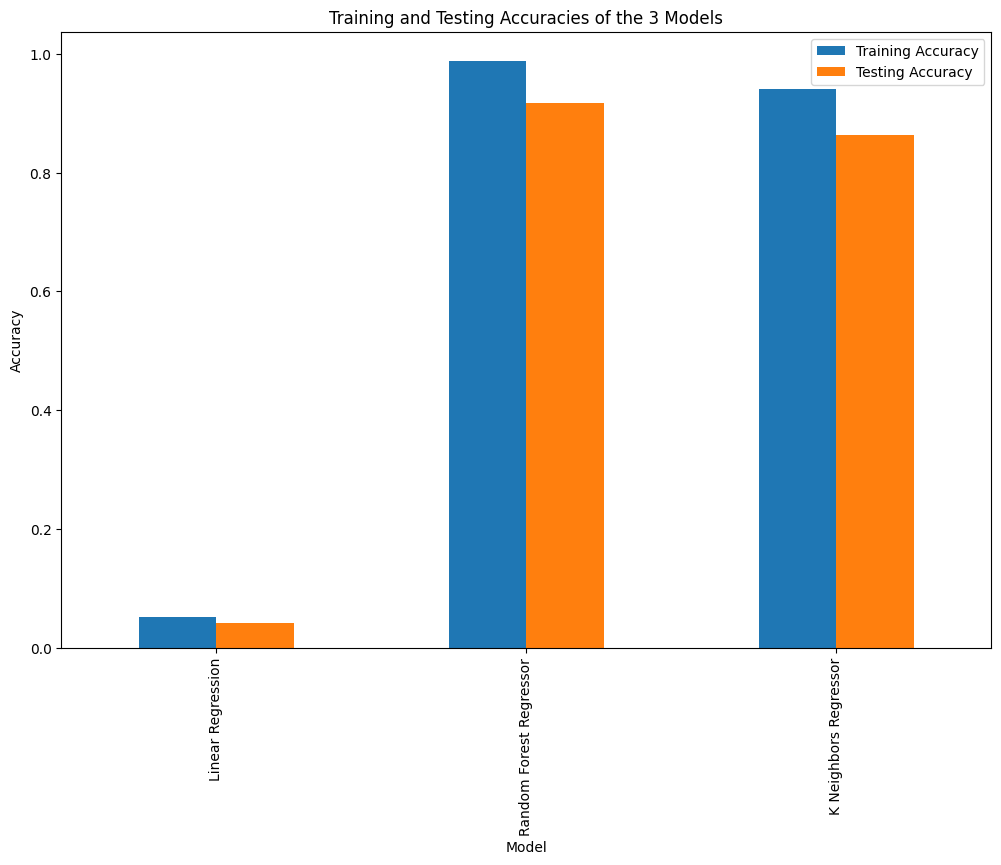

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

accuracy_dataframe.plot(kind='bar', x='Model', ax=ax)

ax.set_title('Training and Testing Accuracies of the 3 Models')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')

#### From the above pandas dataframe and graph, it is clear that Random Forest Regressor has the best accuracy in terms of both training and testing data.

### Predicted Result VS Actual Result

In [33]:
prediction_X_test_random_forest = model_randomForestRegressor.predict(X_test)

y_test = y_test.reset_index(drop=True)

for i in range(len(prediction_X_test)):
  print(f"Predicted Value: {prediction_X_test_random_forest[i]}. Actual Value: {y_test[i]}")

Predicted Value: 43.561699999999995. Actual Value: 44.75
Predicted Value: 43.7303. Actual Value: 51.28
Predicted Value: 23.540600000000026. Actual Value: 25.24
Predicted Value: 40.14960000000002. Actual Value: 35.98
Predicted Value: 35.92409999999998. Actual Value: 38.63
Predicted Value: 21.748499999999975. Actual Value: 21.43
Predicted Value: 26.828400000000006. Actual Value: 28.26
Predicted Value: 92.30080000000004. Actual Value: 99.6
Predicted Value: 83.4243. Actual Value: 87.71
Predicted Value: 28.840400000000002. Actual Value: 28.62
Predicted Value: 57.18379999999996. Actual Value: 49.89
Predicted Value: 100.92039999999999. Actual Value: 96.66
Predicted Value: 89.75099999999999. Actual Value: 98.44
Predicted Value: 24.848699999999976. Actual Value: 25.85
Predicted Value: 37.95539999999998. Actual Value: 34.27
Predicted Value: 47.25490000000004. Actual Value: 51.28
Predicted Value: 35.91399999999996. Actual Value: 30.66
Predicted Value: 23.27719999999999. Actual Value: 28.66
Predic

### Plotting a graph of Predicted Value VS Actual Value

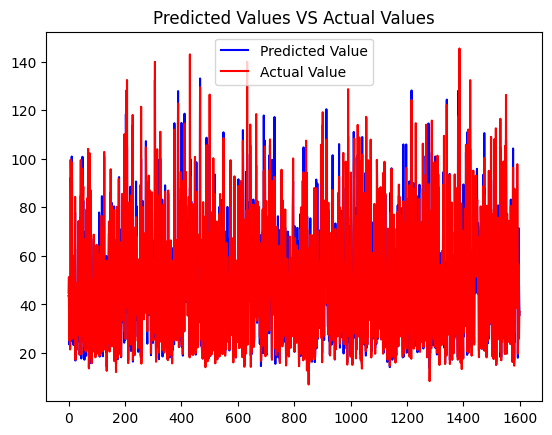

In [34]:
predicted_X_test_plot = list(prediction_X_test_random_forest)
y_test_plot = list(y_test)

plt.plot(predicted_X_test_plot, color='blue', label='Predicted Value')
plt.plot(y_test_plot, color='red', label='Actual Value')
plt.title('Predicted Values VS Actual Values')

plt.legend()

plt.show()

### Generating a pickle file of the ml model

In [35]:
with open('mymodel.pkl', 'wb') as f:
    pickle.dump(model_randomForestRegressor, f)

### Generating a pickle file of the vectorizer

In [36]:
import pickle

with open('mystandardscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)